In [1]:
import itertools
import stumpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from yahoofinancials import YahooFinancials

### Getting available historical price data from Yahoo Finance for NASDAQ 100

In [2]:
ndx = YahooFinancials('NDX')
ndx_price_data = ndx.get_historical_price_data(start_date='2010-01-04', end_date='2019-06-06', time_interval='daily')
ndx_price_df = pd.DataFrame(ndx_price_data['NDX']['prices'])

In [3]:
len(ndx_price_df)

2371

In [4]:
ndx_price_df.head()

,date,high,low,open,close,volume,adjclose,formatted_date
0,1262615400,1889.910034,1881.819946,1882.689941,1886.699951,0.0,1886.699951,2010-01-04
1,1262701800,1891.150024,1877.640015,1887.280029,1888.430054,0.0,1888.430054,2010-01-05
2,1262788200,1893.109985,1873.900024,1887.910034,1878.420044,0.0,1878.420044,2010-01-06
3,1262874600,1881.229980,1867.760010,1878.160034,1876.719971,0.0,1876.719971,2010-01-07
4,1262961000,1893.119995,1868.609985,1870.900024,1892.589966,0.0,1892.589966,2010-01-08


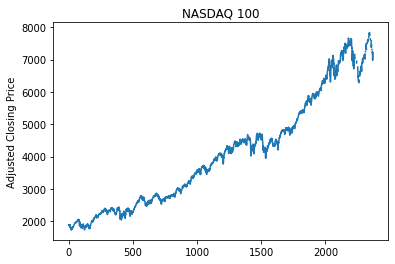

In [5]:
plt.plot(ndx_price_df['adjclose'].to_list())
plt.title('NASDAQ 100')
plt.ylabel('Adjusted Closing Price')
plt.show()

### Matrix Profile for Motif Detection

In [6]:
m = 60
ndx_mp = stumpy.stump(ndx_price_df['adjclose'].values, m)

In [7]:
len(ndx_mp)

2312

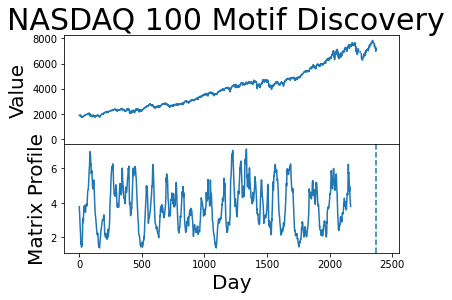

In [8]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('NASDAQ 100 Motif Discovery', fontsize='30')

axs[0].plot(ndx_price_df['adjclose'].values)
axs[0].set_ylabel('Value', fontsize='20')
rect = Rectangle((2371, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((2312, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Day', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=2371, linestyle="dashed")
axs[1].plot(ndx_mp[:, 0])
plt.show()

### Attempt to segment Price Data into 2 Segments

In [9]:
nregimes = 2
ndx_cac, ndx_regime_locations = stumpy.fluss(ndx_mp[:, 1], L=m, n_regimes=nregimes, excl_factor=1)

LinAlgError: SVD did not converge in Linear Least Squares

### Detecting Chains in NASDAQ 100

In [10]:
all_chain_set, unanchored_chain = stumpy.allc(ndx_mp[:, 2], ndx_mp[:, 3])

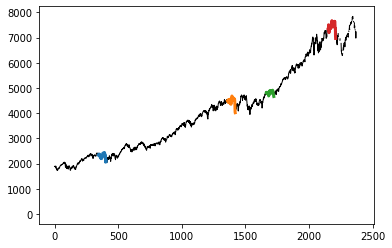

In [11]:
plt.plot(ndx_price_df['adjclose'].values, linewidth=1, color='black')
for i in range(unanchored_chain.shape[0]):
    y = ndx_price_df['adjclose'].iloc[unanchored_chain[i]:unanchored_chain[i]+m]
    x = y.index.values
    plt.plot(x, y, linewidth=3)
color = itertools.cycle(['white', 'gainsboro'])
for i, x in enumerate(range(0, ndx_price_df.shape[0], 52)):
    rect = Rectangle((x, -1), 52, 2.5, facecolor=next(color))
    plt.gca().add_patch(rect)

plt.show()